# Post Process FlanT5 Outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import pickle
import time
from utils import parse_flan_t5_outputs, vis_prob_flow, vis_heatmap, test_acc, majority_vote_acc

In [2]:
flan_t5_lines = open('../outputs/gsm8k/train_flan_t5_complex.txt').readlines()

In [ ]:
flan_questions = pickle.load(open('flan_questions.pkl', 'rb'))
flan_answers = pickle.load(open('flan_answers.pkl', 'rb'))
flan_predictions = pickle.load(open('flan_predictions.pkl', 'rb'))
flan_per_step_probs = pickle.load(open('flan_per_step_probs.pkl', 'rb'))

In [3]:
flan_questions, flan_answers, flan_predictions, flan_per_step_probs = parse_flan_t5_outputs(flan_t5_lines)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7473/7473 [01:45<00:00, 71.03it/s]


In [9]:
len(flan_questions), len(flan_answers), len(flan_predictions), len(flan_per_step_probs)

(7473, 7473, 7473, 7473)

In [10]:
pickle.dump(flan_questions, open('flan_questions.pkl', 'wb'))

In [11]:
pickle.dump(flan_answers, open('flan_answers.pkl', 'wb'))

In [12]:
pickle.dump(flan_predictions, open('flan_predictions.pkl', 'wb'))

In [4]:
pickle.dump(flan_per_step_probs, open('flan_per_step_probs.pkl', 'wb'))

In [7]:
start_time = time.time()
flan_per_step_probs_ = pickle.load(open('flan_per_step_probs.pkl', 'rb'))
print('load time %.2fs' % (time.time() - start_time))

load time 61.29s


## Training performance, random acc 11.17, majority voting 20.23

In [4]:
test_acc(flan_predictions, flan_answers)

total 7473, pred 835, acc 0.1117


0.11173558142646862

In [6]:
majority_vote_acc(flan_predictions, flan_answers)

total 7473, pred 1512, acc 0.2023


1512

Question 0: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72

Model output 4:  In May she sold 48 / 2 = 24 clips. Therefore Natalia sold 48 + 24 = 72 clips in April and May. The answer is 72</s>


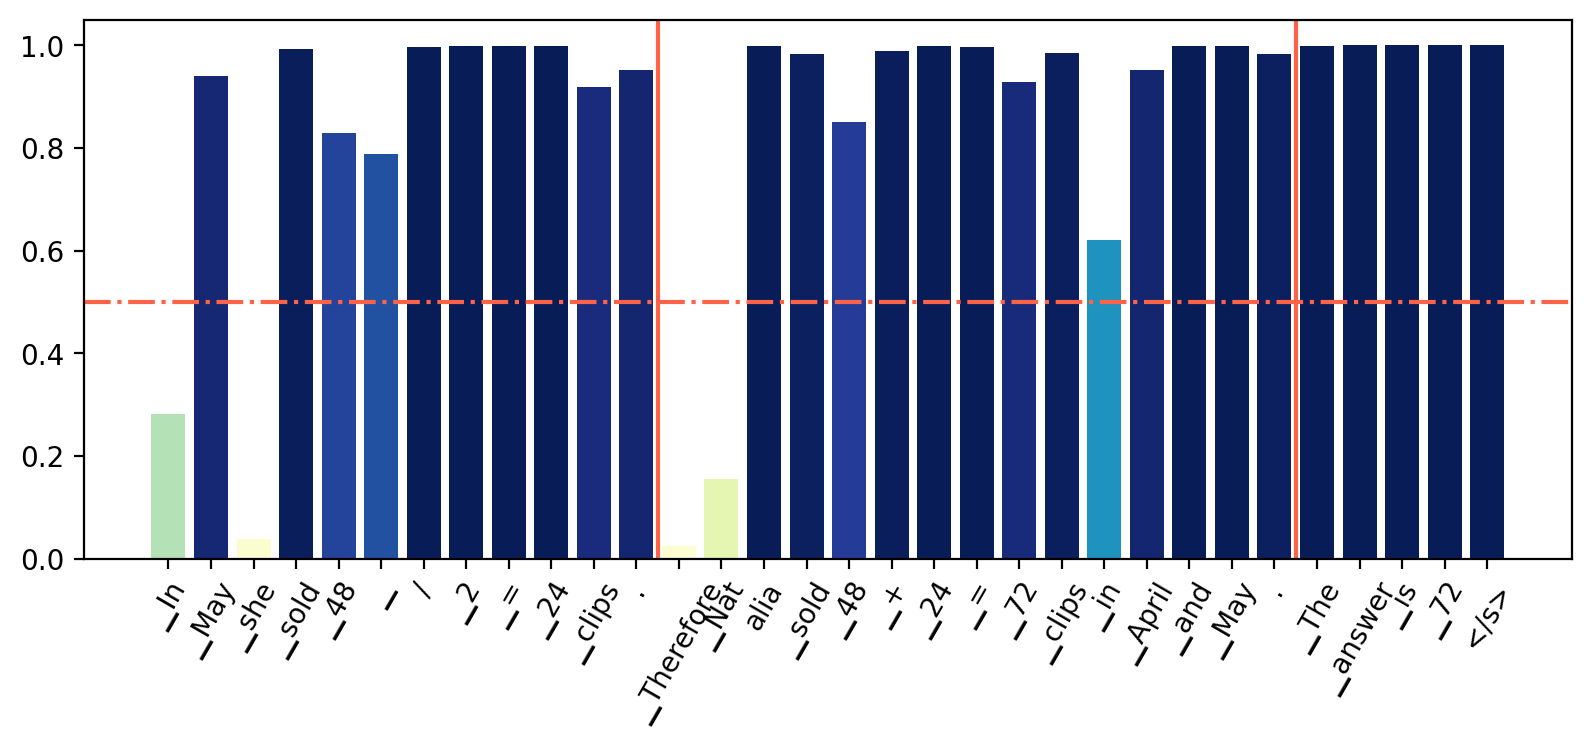

In [20]:
vis_prob_flow(flan_questions, flan_answers, flan_predictions, flan_per_step_probs, 0, 4)

Question 1000: John buys a heating pad for $30.  He uses it 3 times a week for 2 weeks.  How much does he spend on each use?

Answer: He uses it 3*2=<<3*2=6>>6 times
So he pays 30/6=$<<30/6=5>>5
#### 5

Model output 19:  If he uses it over 2 weeks, it costs 2 * 30 = 60 dollars in total. So, he spends 60 / 3 = 20 dollars per use. The answer is 20</s>


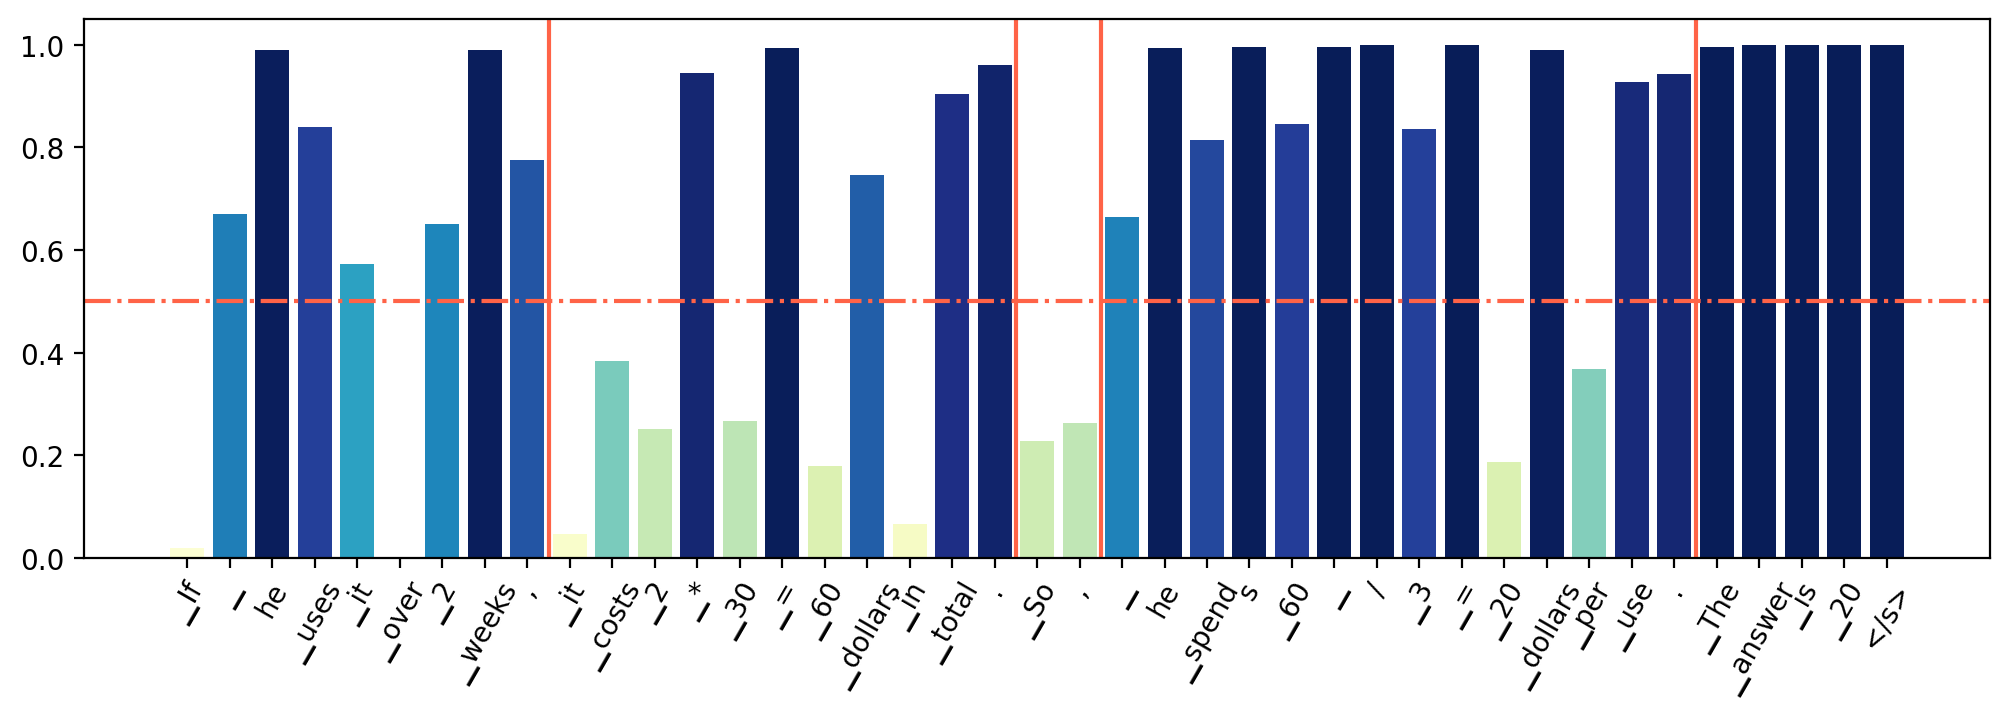

In [23]:
vis_prob_flow(flan_questions, flan_answers, flan_predictions, flan_per_step_probs, 1000, 19)

Question 1000: John buys a heating pad for $30.  He uses it 3 times a week for 2 weeks.  How much does he spend on each use?

Answer: He uses it 3*2=<<3*2=6>>6 times
So he pays 30/6=$<<30/6=5>>5
#### 5

Model output 19:  If he uses it over 2 weeks, it costs 2 * 30 = 60 dollars in total. So, he spends 60 / 3 = 20 dollars per use. The answer is 20</s>


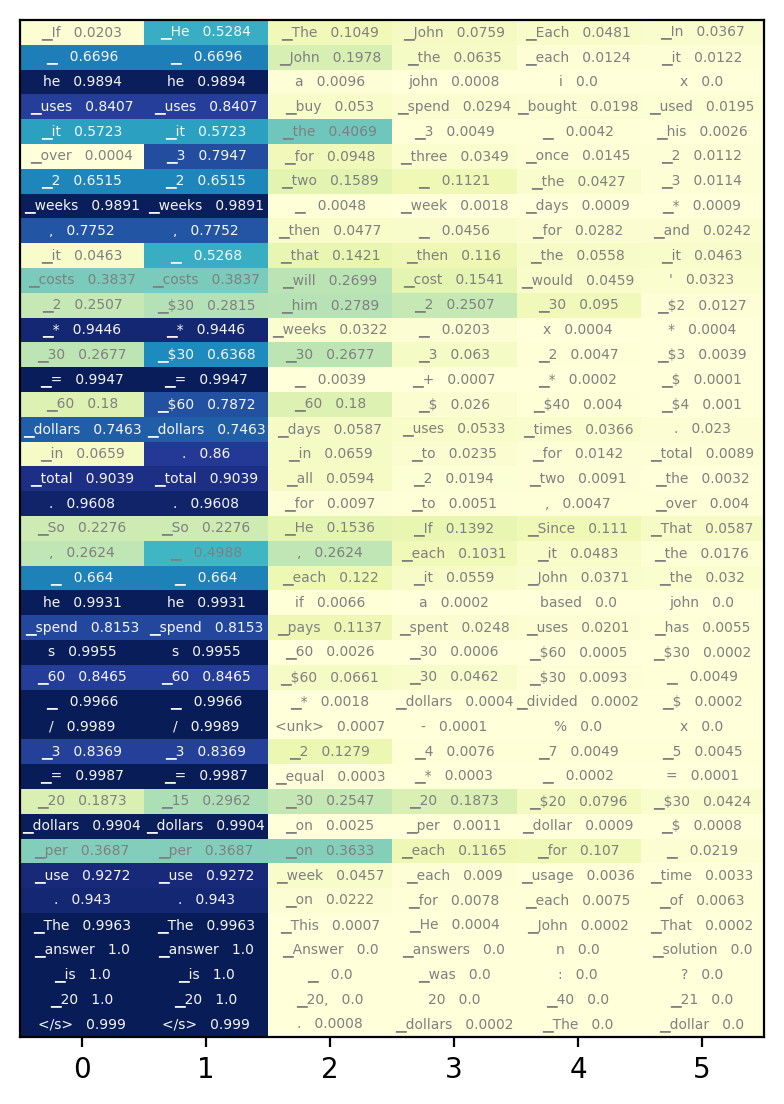

In [24]:
vis_heatmap(flan_questions, flan_answers, flan_predictions, flan_per_step_probs, 1000, 19)

Question 0: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72

Model output 0:  In May she sold 48 / 2 = 24 more clips. Natalia sold 48 + 24 = 72 clips altogether in April and May. The answer is 72</s>


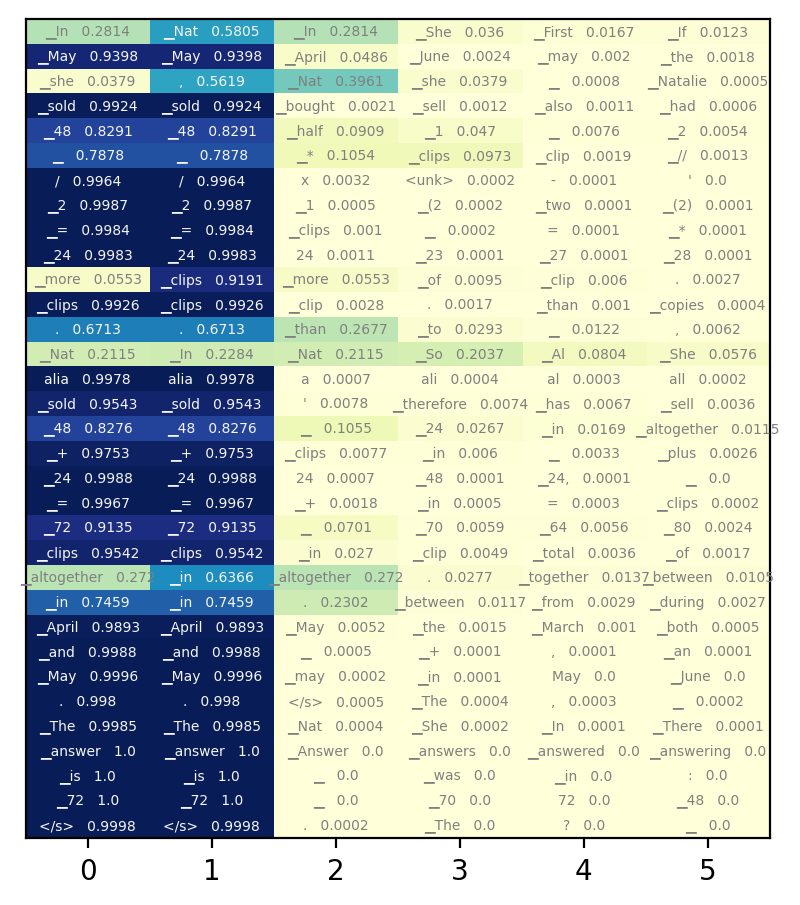

In [8]:
vis_heatmap(flan_questions, flan_answers, flan_predictions, flan_per_step_probs, 0, 0)